In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

1. Importing libraries and dataset.
2. dataset is downloaded from kaggle.

In [2]:
df=pd.read_csv('HousingData.csv',header=0)

Looking the first 5 rows of the dataset

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


Describing the number of rows and columns in the datset

In [4]:
df.shape

(506, 14)

Information about the datset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


All the information related to dataset like mean, median, mode, std,  maximum and minimum values

In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560262,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Plotting boxplot of all the features

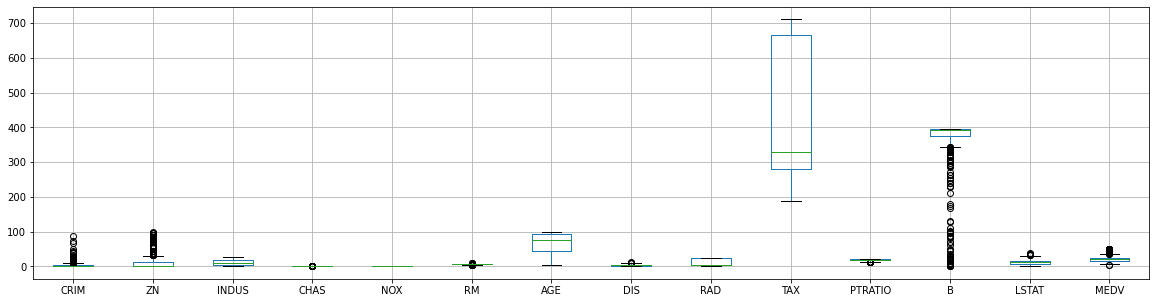

In [7]:
df.boxplot(figsize=(20,5))

plotting histogram for feature B and CRIM

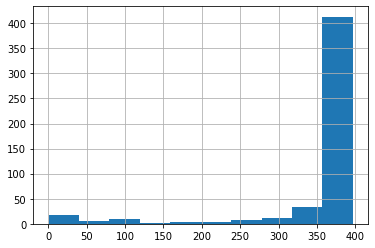

In [8]:
df.B.hist()

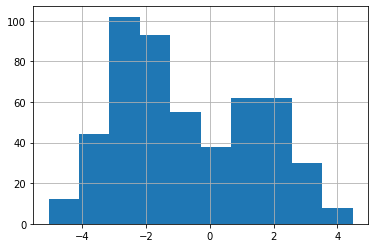

In [61]:
df.CRIM.hist()

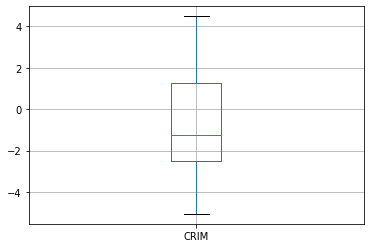

In [62]:
df.boxplot(column='CRIM')

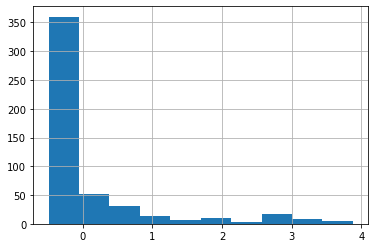

In [64]:
data_scaled.ZN.hist()

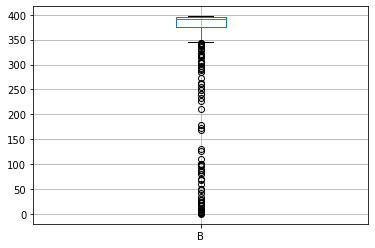

In [9]:
df.boxplot(column='B')

Huge amount of outliers present in this category

In [10]:
df['B'].describe()

count    506.000000
mean     356.674032
std       91.294864
min        0.320000
25%      375.377500
50%      391.440000
75%      396.225000
max      396.900000
Name: B, dtype: float64

As we see above there is huge difference between min and 25% so outliers are present now we will treat outliers with inter quantile by taking difference between the ranges

In [11]:
upper_boundary=df['B'].mean()+3*df['B'].std()
lower_boundary=df['B'].mean()-3*df['B'].std()

In [12]:
upper_boundary,lower_boundary

(630.5586247730259, 82.7894384680792)

In [13]:
iqr=df.B.quantile(0.75)-df.B.quantile(0.25)

In [14]:
iqr

20.847500000000025

In [15]:
lower_bridge=df['B'].quantile(0.25)-(iqr*1.5)
upper_bridge=df['B'].quantile(0.75)+(iqr*1.5)

In [16]:
lower_bridge,upper_bridge

(344.10624999999993, 427.49625000000003)

treatment of outliers in B column since it is left skewed as we have observed above we use the lower bridge value for the treatment of the outliers

In [17]:
data=df.copy()

In [18]:
data.loc[data['B']<350,'B']=350

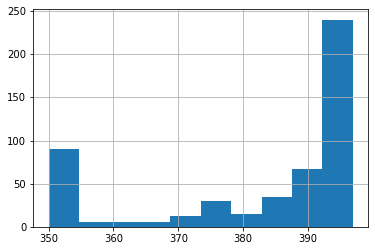

In [19]:
data['B'].hist()

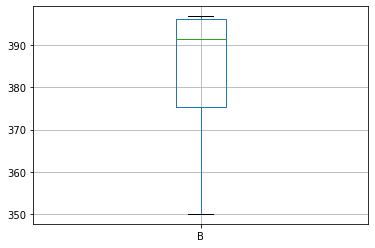

In [20]:
data.boxplot(column='B')

Correlation matrix to find the correlation between the features

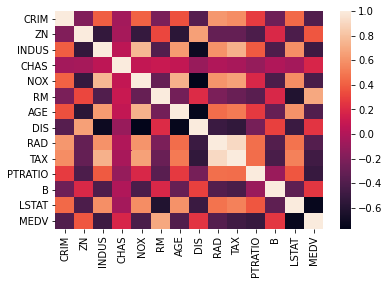

In [21]:
corr_mat=data.corr()
sns.heatmap(corr_mat)

As i have observed there is no so much correlation which need to be drop

In [54]:
corr_mat

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.191178,0.401863,-0.054355,0.417130,-0.219150,0.354342,-0.374166,0.624765,0.580595,0.281110,-0.268629,0.444943,-0.391363
ZN,-0.191178,1.000000,-0.531871,-0.037229,-0.513704,0.320800,-0.563801,0.656739,-0.310919,-0.312371,-0.414046,0.191520,-0.414193,0.373136
INDUS,0.401863,-0.531871,1.000000,0.059859,0.764866,-0.390234,0.638431,-0.711709,0.604533,0.731055,0.390954,-0.406323,0.590690,-0.481772
CHAS,-0.054355,-0.037229,0.059859,1.000000,0.075097,0.104885,0.078831,-0.093971,0.001468,-0.032304,-0.111304,-0.001493,-0.047424,0.181391
NOX,0.417130,-0.513704,0.764866,0.075097,1.000000,-0.302188,0.731548,-0.769230,0.611441,0.668023,0.188933,-0.419884,0.582641,-0.427321
RM,-0.219150,0.320800,-0.390234,0.104885,-0.302188,1.000000,-0.247337,0.205246,-0.209847,-0.292048,-0.355501,0.186764,-0.614339,0.695360
AGE,0.354342,-0.563801,0.638431,0.078831,0.731548,-0.247337,1.000000,-0.744844,0.458349,0.509114,0.269226,-0.302285,0.602891,-0.394656
DIS,-0.374166,0.656739,-0.711709,-0.093971,-0.769230,0.205246,-0.744844,1.000000,-0.494588,-0.534432,-0.232471,0.297939,-0.493328,0.249929
RAD,0.624765,-0.310919,0.604533,0.001468,0.611441,-0.209847,0.458349,-0.494588,1.000000,0.910228,0.464741,-0.384734,0.479541,-0.381626
TAX,0.580595,-0.312371,0.731055,-0.032304,0.668023,-0.292048,0.509114,-0.534432,0.910228,1.000000,0.460853,-0.424400,0.536110,-0.468536


In [22]:
data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [23]:
data=data.fillna(data.mean())

We have filled all the null values in the respected columns with their mean

In [24]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

We have plotted the scatter plot for better visualisation of the columns

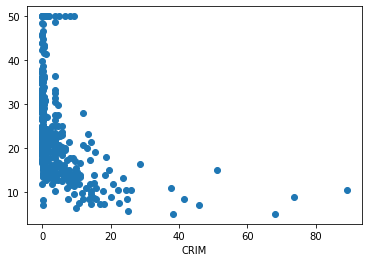

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


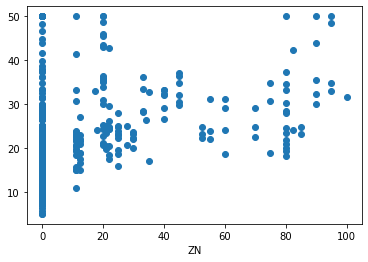

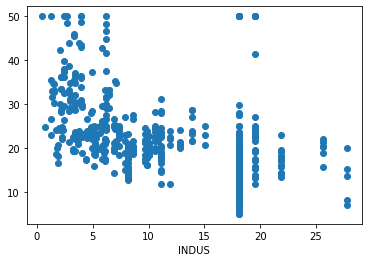

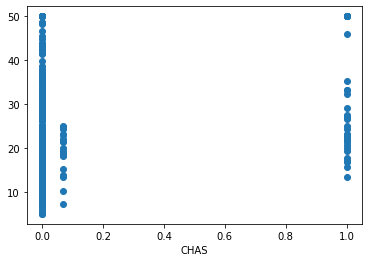

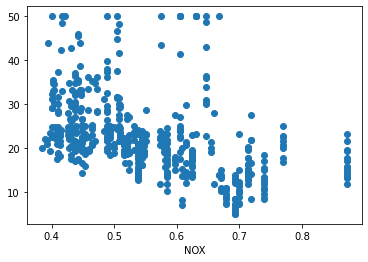

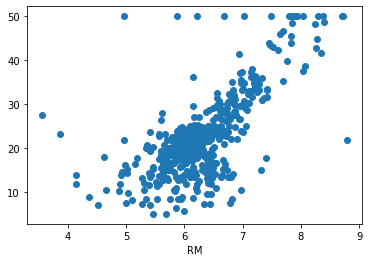

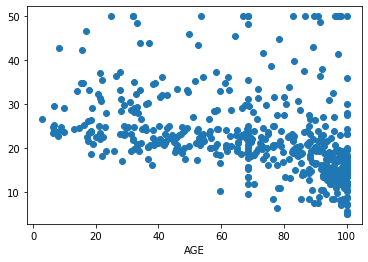

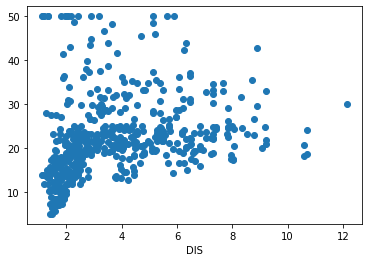

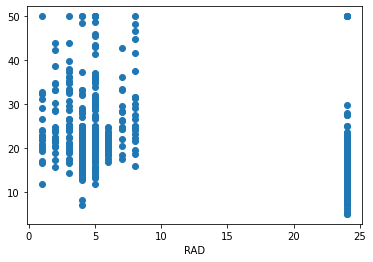

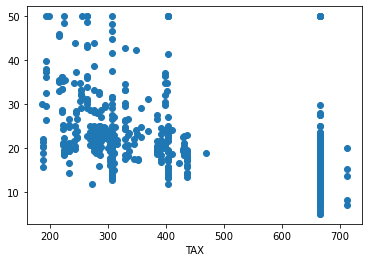

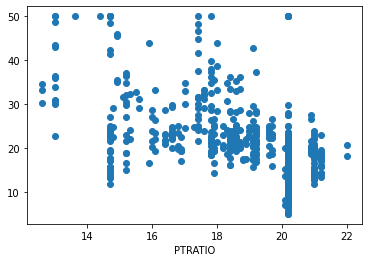

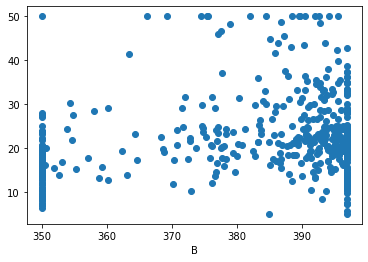

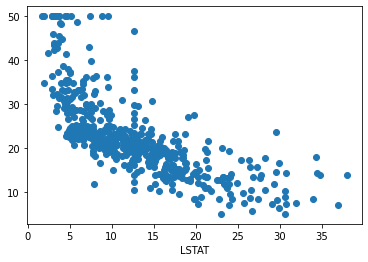

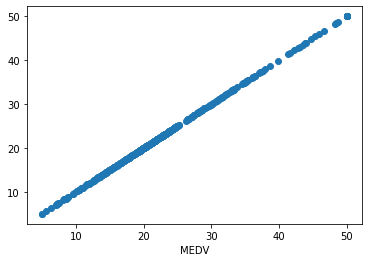

In [25]:
for i in data:
    df[i]=np.log(data[i])
    plt.scatter(data[i],data['MEDV'])
    plt.xlabel(i)
    plt.show()

We will convert dataset into standard scale as some of values are -inf so to make all the features on the same scale we have used standard scaler

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaled=StandardScaler()
data_scaled=scaled.fit_transform(data)

In [28]:
data_scaled

array([[-0.42232846,  0.29644292, -1.31101039, ...,  0.81524344,
        -1.10414593,  0.15968566],
       [-0.41986984, -0.48963852, -0.5997709 , ...,  0.81524344,
        -0.51035272, -0.10152429],
       [-0.41987219, -0.48963852, -0.5997709 , ...,  0.57930564,
        -1.23974774,  1.32424667],
       ...,
       [-0.41595175, -0.48963852,  0.1264106 , ...,  0.81524344,
        -1.00993835,  0.14880191],
       [-0.41023216, -0.48963852,  0.1264106 , ...,  0.61524703,
        -0.8900378 , -0.0579893 ],
       [-0.41751548, -0.48963852,  0.1264106 , ...,  0.81524344,
        -0.69020355, -1.15724782]])

In [29]:
data_scaled=pd.DataFrame(data_scaled,columns=data.columns)

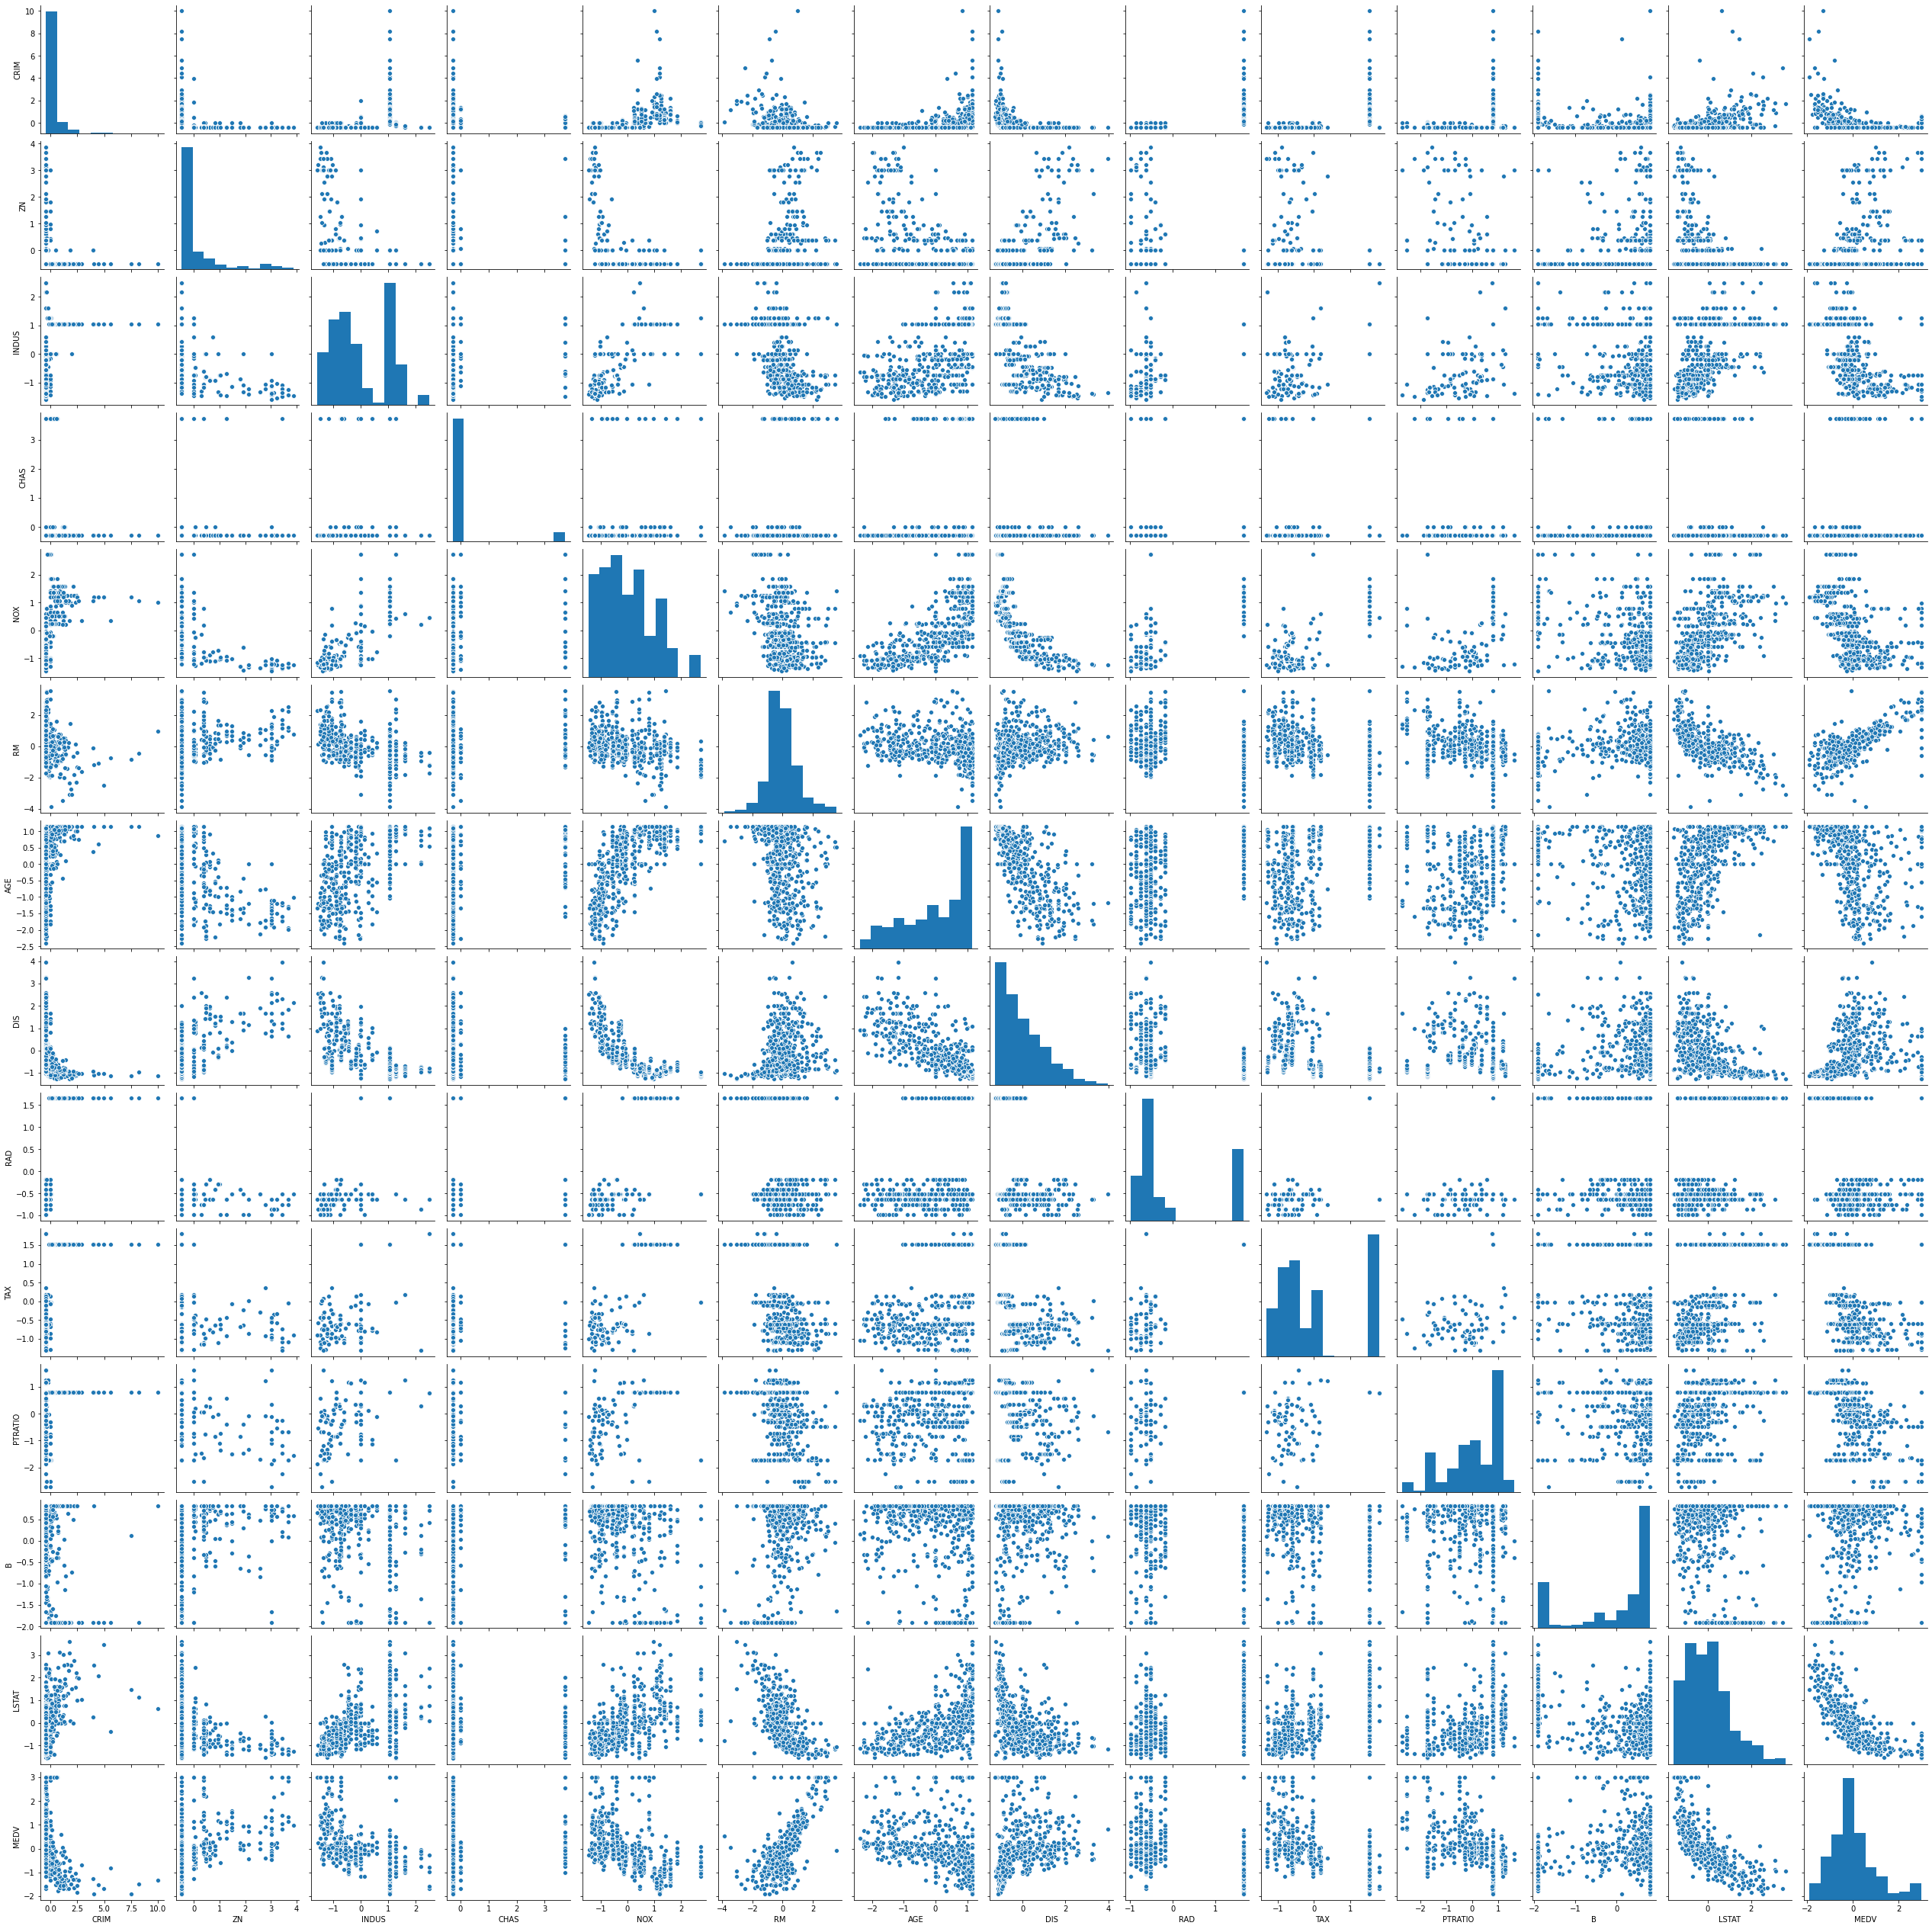

In [30]:
sns.pairplot(data_scaled)

Splitting data into test and train set to apply feature engineering and apply in the model for prediction

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [34]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [35]:
from sklearn.feature_selection import f_classif,SelectKBest

### f test ANOVA

In [36]:
fcls=f_classif(x_train,y_train)
fcls


(array([3.37870981, 1.50355467, 2.10710016, 1.1034008 , 2.49514426,
        2.71828181, 2.40784519, 1.36449053, 2.44492851, 2.52380617,
        1.86007937, 1.54823225, 5.69898941]),
 array([6.69325005e-17, 2.11348118e-03, 1.15377752e-07, 2.44343656e-01,
        1.46796458e-10, 3.30153471e-12, 6.55865160e-10, 1.44623387e-02,
        3.47052988e-10, 8.99102463e-11, 7.57431371e-06, 1.09247791e-03,
        9.52834885e-31]))

We select p values for the best features

In [37]:
p_values=pd.Series(fcls[1])
p_values.index=x_train.columns
p_values.sort_values(ascending=True)

LSTAT      9.528349e-31
CRIM       6.693250e-17
RM         3.301535e-12
TAX        8.991025e-11
NOX        1.467965e-10
RAD        3.470530e-10
AGE        6.558652e-10
INDUS      1.153778e-07
PTRATIO    7.574314e-06
B          1.092478e-03
ZN         2.113481e-03
DIS        1.446234e-02
CHAS       2.443437e-01
dtype: float64

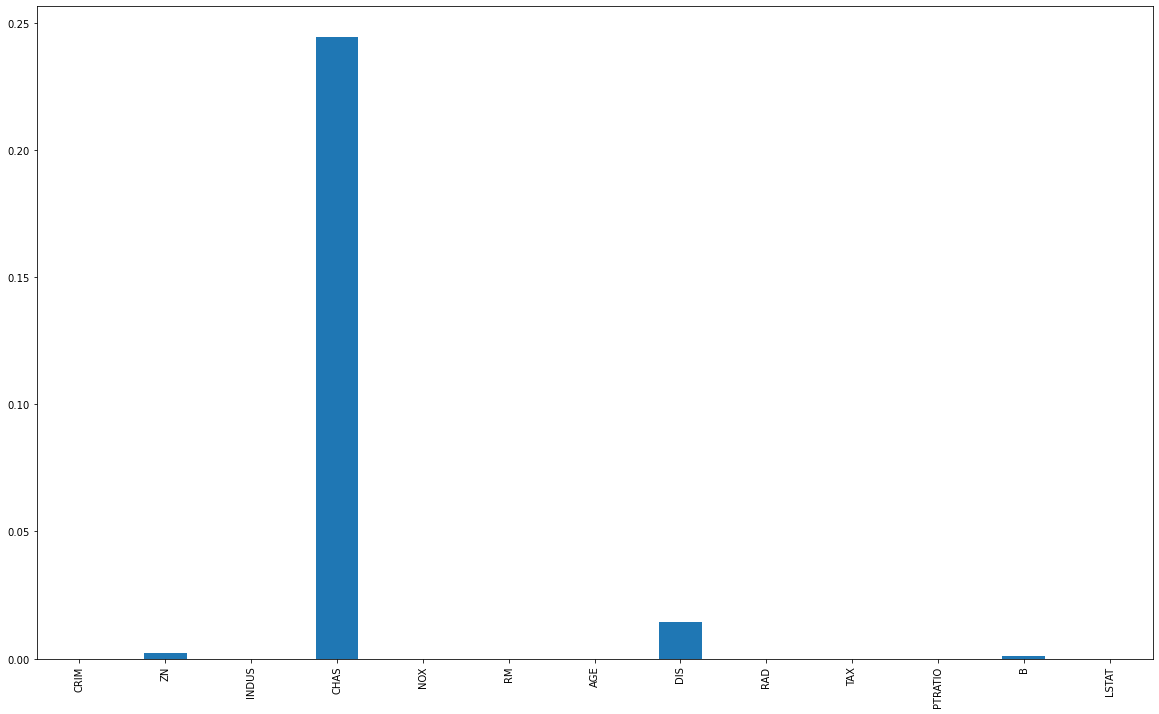

In [38]:
p_values.plot.bar(figsize=(20,12))

In [39]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.feature_selection import RFE

Here we are using recursive feature elimination to enhance the accuracy of the model and using ensemble techniques for prediction

In [40]:
for i in range(1,13):
    sel=RFE(RandomForestRegressor(n_estimators=100,random_state=0,n_jobs=-1))
    sel.fit(x_train,y_train)

In [41]:
sel.get_support()

array([ True, False, False, False,  True,  True, False,  True, False,
       False,  True, False,  True])

In [42]:
features=x_train.columns[sel.get_support()]

In [43]:
features

Index(['CRIM', 'NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT'], dtype='object')

In [44]:
for i in range(1,13):
    sel=RFE(GradientBoostingRegressor(n_estimators=100,random_state=0),n_features_to_select=i)
    sel.fit(x_train,y_train)

In [45]:
sel.get_support()

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [46]:
features=x_train.columns[sel.get_support()]
features

Index(['CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [47]:
from sklearn.metrics import accuracy_score,mean_absolute_error,r2_score,mean_squared_error
for i in range(1,13):
    sel=RFE(GradientBoostingRegressor(n_estimators=100,random_state=0),n_features_to_select=i)
    sel.fit(x_train,y_train)
    x_train_rfe=sel.transform(x_train)
    x_test_rfe=sel.transform(x_test)
    print('selected features :',i)
    clf=GradientBoostingRegressor()
    clf.fit(x_train_rfe,y_train)
    y_pred1=clf.predict(x_test_rfe)
    print(mean_squared_error(y_test,y_pred1))

selected features : 1
47.281641495705195
selected features : 2
28.286411222222586
selected features : 3
27.64841593360753
selected features : 4
19.867601436479195
selected features : 5
18.45651996524417
selected features : 6
19.33102901537323
selected features : 7
17.993136461483594
selected features : 8
16.224466836762804
selected features : 9
16.96036073348448
selected features : 10
17.443533829767098
selected features : 11
17.718627673245336
selected features : 12
19.76780754139011


In [57]:
for i in range(1,14):
    sel=RFE(RandomForestRegressor(n_estimators=100,random_state=0,n_jobs=-1),n_features_to_select=i)
    sel.fit(x_train,y_train)
    x_train_rfr=sel.transform(x_train)
    x_test_rfr=sel.transform(x_test)
    print('features selected :',i)
    clfr=RandomForestRegressor()
    clfr.fit(x_train_rfr,y_train)
    y_pred2=clfr.predict(x_test_rfr)
    print('mean absolute error :',mean_absolute_error(y_test,y_pred2))
    print('mean squared error :',mean_squared_error(y_test,y_pred2))
    print('r2 score :',r2_score(y_test,y_pred2))

features selected : 1
mean absolute error : 4.738413562091503
mean squared error : 50.552714507623534
r2 score : 0.37917618107360507
features selected : 2
mean absolute error : 3.2412549019607853
mean squared error : 29.503564039215675
r2 score : 0.6376749403634273
features selected : 3
mean absolute error : 3.189
mean squared error : 27.643056882352944
r2 score : 0.6605233110100566
features selected : 4
mean absolute error : 2.797833333333334
mean squared error : 20.757898774509794
r2 score : 0.745078021712656
features selected : 5
mean absolute error : 2.7225686274509813
mean squared error : 18.39585360784313
r2 score : 0.774085641088377
features selected : 6
mean absolute error : 2.749078431372551
mean squared error : 21.40848580392157
r2 score : 0.7370883434515116
features selected : 7
mean absolute error : 2.616196078431373
mean squared error : 17.673689431372537
r2 score : 0.7829543383738748
features selected : 8
mean absolute error : 2.6732549019607856
mean squared error : 20.24

These values are regarding alinear regression running on the original train test split

In [48]:
mean_squared_error(y_test,y_pred)

35.85471490329628

In [49]:
mean_absolute_error(y_test,y_pred)

4.028766049857309

In [50]:
r2_score(y_test,y_pred)

0.5596782240165419

In [60]:
lr=LinearRegression()
lr.fit(x_train_rfr,y_train)
y_pred=lr.predict(x_test_rfr)
print('mean absolute error :',mean_absolute_error(y_test,y_pred))
print('mean squared error :',mean_squared_error(y_test,y_pred))
print('r2 score :',r2_score(y_test,y_pred))

mean absolute error : 4.028766049857309
mean squared error : 35.85471490329628
r2 score : 0.5596782240165419


These values after performing feature engineering on the dataset

In [51]:
r2_score(y_test,y_pred1)

0.7572370566214187

In [52]:
mean_absolute_error(y_test,y_pred1)

2.8202003485458733

In [53]:
mean_squared_error(y_test,y_pred1)

19.76780754139011